# Google Play Store Analysis

Author Name:    Asia Siddiqui\
Email:          asiasiddiqui800@gmail.com

The data was collected from this [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/code):

### Purpose of this Analysis

Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head(3)        

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.drop_duplicates(subset='App', inplace=True)

In [5]:
df.shape

(9660, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [7]:
df.isnull().sum()*100/df.shape[0]

App                0.000000
Category           0.000000
Rating            15.144928
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.010352
Price              0.000000
Content Rating     0.010352
Genres             0.000000
Last Updated       0.000000
Current Ver        0.082816
Android Ver        0.031056
dtype: float64

In [8]:
df.isnull().sum()   

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Change type

In [9]:
# Convert 'Rating' column to float
df['Rating'] = df['Rating'].astype(float)


In [10]:
## Convert the 'Reviews' column to a numeric data type (float)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Handle missing values in the 'Reviews' column
df['Reviews'].fillna(0, inplace=True)

# Convert the 'Reviews' column to an integer data type
df['Reviews'] = df['Reviews'].astype(int)

In [11]:
# Convert 'Install' column to string
df['Installs'] = df['Installs'].astype(str)

# Remove unwanted characters from 'Install' column
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = df['Installs'].str.replace('+', '')

# Convert 'Installs' column to numeric
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')


In [12]:
# Convert 'Price' column to string
df['Price'] = df['Price'].astype(str)

# Remove unwanted characters from 'Price' column
df['Price'] = df['Price'].str.replace('$', '')

# Convert 'Price' column to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [13]:
# Convert 'Last Updated' column to string
df['Last Updated'] = df['Last Updated'].astype(str)

# Handle inconsistent date formats
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [14]:
df['Size'] = df['Size'].astype(str)
# to convert the size column to numeric, we need to handle the 'Varies with device' value
df['Size'] = df['Size'].str.replace('Varies with device', '0')
df['Size'] = df['Size'].str.replace('M', '')
df['Size'] = df['Size'].str.replace('k', '')
df['Size'] = df['Size'].str.replace(',', '')
df['Size'] = df['Size'].str.replace('+', '')    
df['Size'] = df['Size'].astype(float)

In [15]:
df.isnull().sum()   

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

In [16]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df['Installs'].fillna(df['Installs'].mean(), inplace=True)
df['Type'].fillna(df['Type'].mode()[0], inplace=True)
df['Content Rating'].fillna(df['Content Rating'].mode()[0], inplace=True)
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)
df['Last Updated'].fillna(df['Last Updated'].mode()[0], inplace=True)
df['Price'].fillna(df['Price'].mean(), inplace=True)

In [17]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [18]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated
count,9660.000000,9.660000e+03,9660.000000,9.660000e+03,9660.000000,9660
mean,4.175052,2.165701e+05,32.516698,7.777507e+06,1.099299,2017-10-30 20:15:12.298136576
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.000000,2.500000e+01,3.400000,1.000000e+03,0.000000,2017-08-05 18:00:00
50%,4.200000,9.670000e+02,10.000000,1.000000e+05,0.000000,2018-05-04 00:00:00
75%,4.500000,2.939400e+04,28.000000,1.000000e+06,0.000000,2018-07-17 00:00:00
max,19.000000,7.815831e+07,1020.000000,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.516794,1.831226e+06,96.980251,5.375550e+07,16.851280,NaN


## 1. What are the top-rated apps in each category?


In [19]:
# Group the DataFrame by category and find the app with the highest rating in each group
top_rated_apps = df.groupby('Category').apply(lambda x: x.loc[x['Rating'].idxmax()])

# Display the top-rated apps in each category
for index, row in top_rated_apps.iterrows():
    print(f"Category: {row['Category']}")
    print(f"App Name: {row['App']}")
    print(f"Rating: {row['Rating']}")
    

Category: 1.9
App Name: Life Made WI-Fi Touchscreen Photo Frame
Rating: 19.0
Category: ART_AND_DESIGN
App Name: Spring flowers theme couleurs d t space
Rating: 5.0
Category: AUTO_AND_VEHICLES
App Name: Tickets SDA 2018 and Exam from the State Traffic Safety Inspectorate with Drom.ru
Rating: 4.9
Category: BEAUTY
App Name: ipsy: Makeup, Beauty, and Tips
Rating: 4.9
Category: BOOKS_AND_REFERENCE
App Name: R Programing Offline Tutorial
Rating: 5.0
Category: BUSINESS
App Name: Ag Valley Cooperative
Rating: 5.0
Category: COMICS
App Name: Hojiboy Tojiboyev Life Hacks
Rating: 5.0
Category: COMMUNICATION
App Name: BS-Mobile
Rating: 5.0
Category: DATING
App Name: American Girls Mobile Numbers
Rating: 5.0
Category: EDUCATION
App Name: Learn Japanese, Korean, Chinese Offline & Free
Rating: 4.9
Category: ENTERTAINMENT
App Name: 🔥 Football Wallpapers 4K | Full HD Backgrounds 😍
Rating: 4.7
Category: EVENTS
App Name: SUMMER SONIC app
Rating: 5.0
Category: FAMILY
App Name: Hey AJ! It's Bedtime!
Rating:

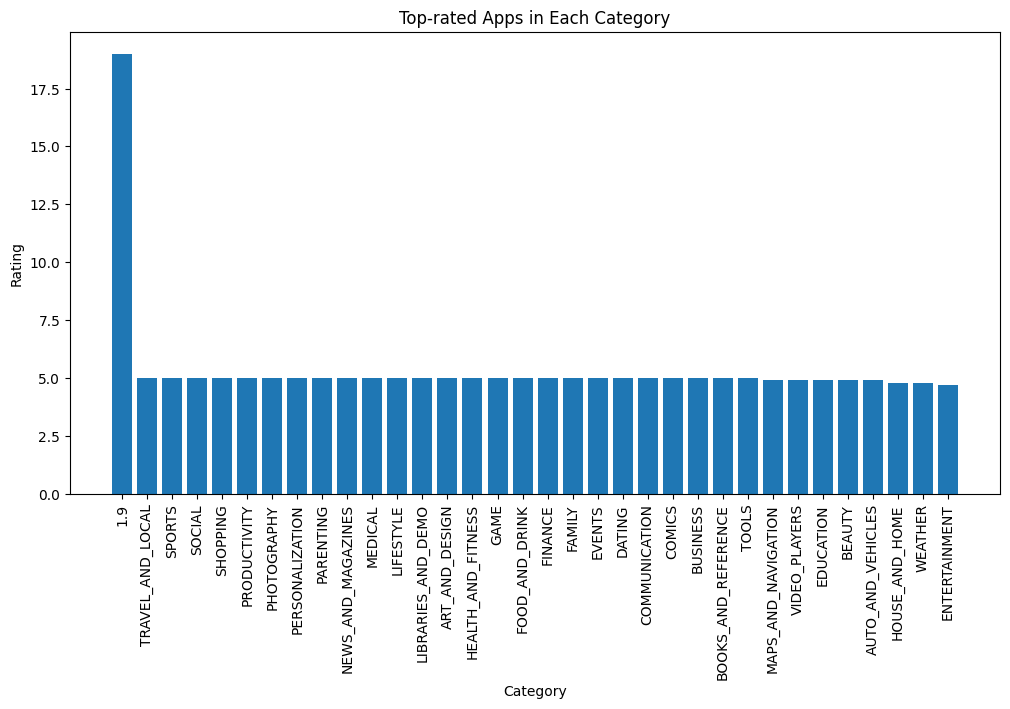

In [20]:
# Select the desired columns
top_rated_apps = top_rated_apps[['Category', 'App', 'Rating']]

# Sort the top-rated apps by rating
top_rated_apps = top_rated_apps.sort_values('Rating', ascending=False)

# Plot the top-rated apps
plt.figure(figsize=(12, 6))
plt.bar(top_rated_apps['Category'], top_rated_apps['Rating'])
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Top-rated Apps in Each Category')
plt.xticks(rotation=90)
plt.show()

## 2. Which category has the highest number of installations?

In [21]:
# Filter out rows with missing values in 'Installs' column
df = df.dropna(subset=['Installs'])

# Convert 'Installs' column to string format
df['Installs'] = df['Installs'].astype(str)

# Remove non-numeric characters from 'Installs' column
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)

# Convert 'Installs' column to numeric format
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Group by category and sum the installations
category_installations = df.groupby('Category')['Installs'].sum()

# Find the category with the highest number of installations
max_installations_category = category_installations.idxmax()

print("Category with the highest number of installations:", max_installations_category)

Category with the highest number of installations: GAME


## 3. Which app has the highest number of reviews?

In [22]:
# Find the app with the highest number of reviews
max_reviews = df['Reviews'].max()
app_with_max_reviews = df[df['Reviews'] == max_reviews]['App'].values[0]

print("App with the highest number of reviews:", app_with_max_reviews)
print("Number of reviews:", max_reviews)




App with the highest number of reviews: Facebook
Number of reviews: 78158306


## 4. What is the distribution of app ratings across different categories?

C:\Users\Jawad hussain\AppData\Local\Temp\ipykernel_7748\3325481404.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Category', x='Rating', data=df, palette='Set3')


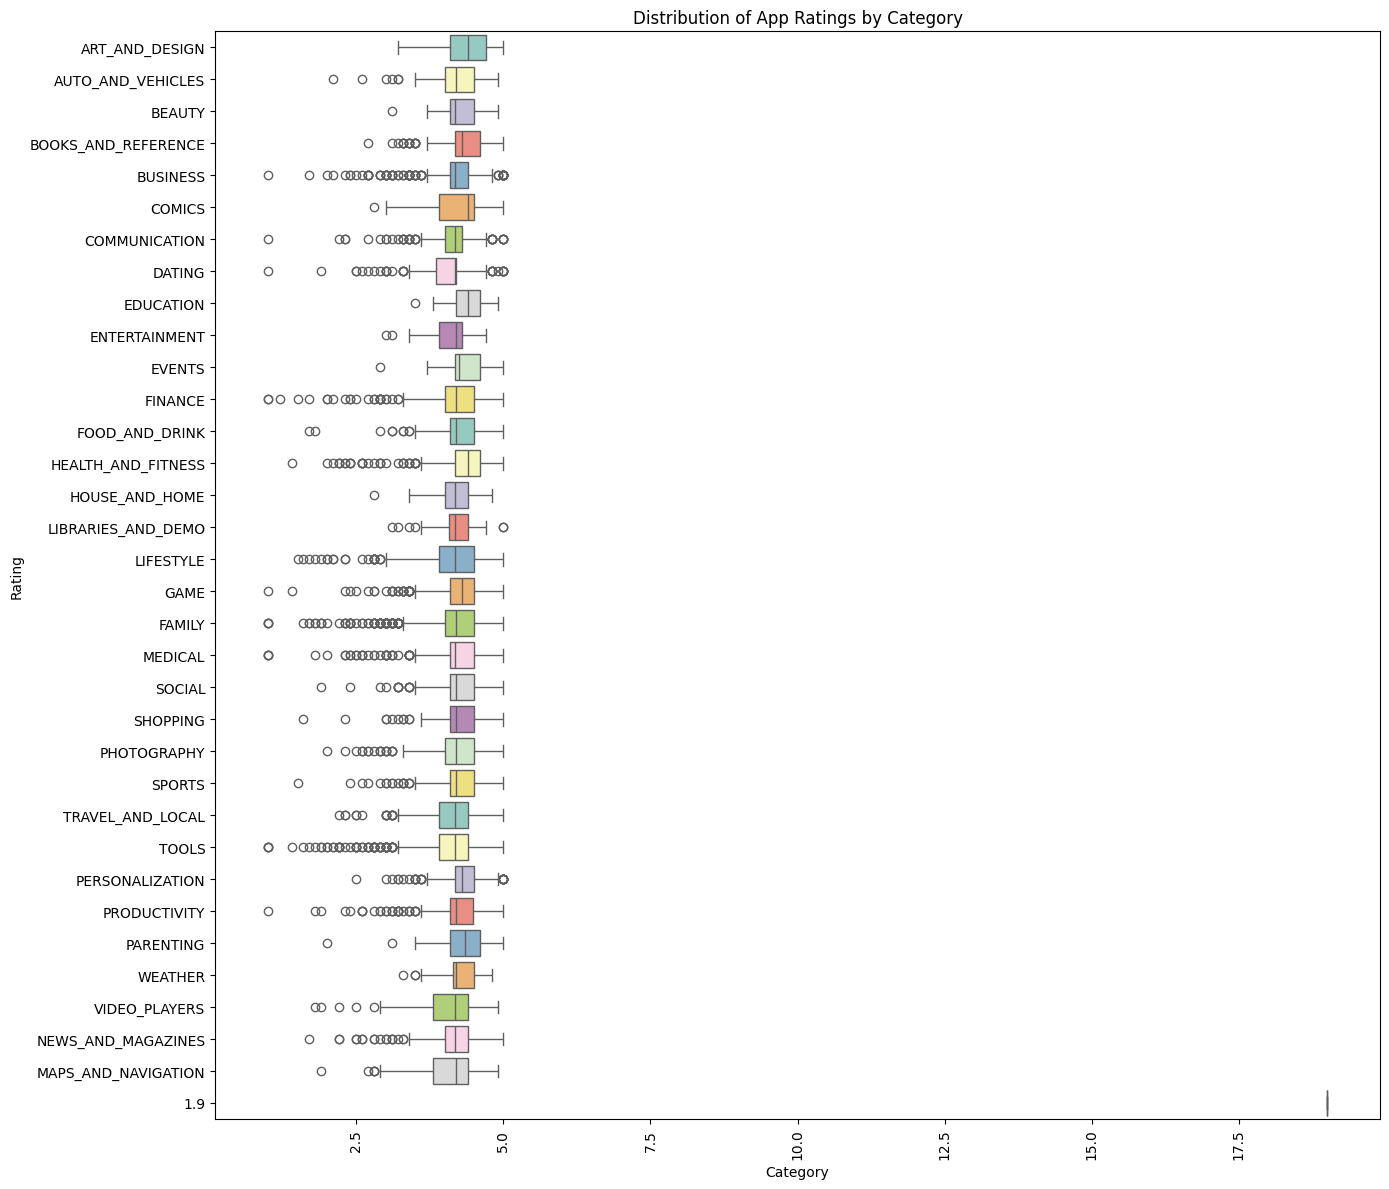

In [23]:
# Set the figure size
plt.figure(figsize=(14, 12))

# Create the boxplot using Seaborn
sns.boxplot(y='Category', x='Rating', data=df, palette='Set3')

# Set the labels and title
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Distribution of App Ratings by Category')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Display the plot
plt.show()


## 5. Are paid apps generally rated higher than free apps?

C:\Users\Jawad hussain\AppData\Local\Temp\ipykernel_7748\1817430865.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Rating', data=df, palette='Set3')


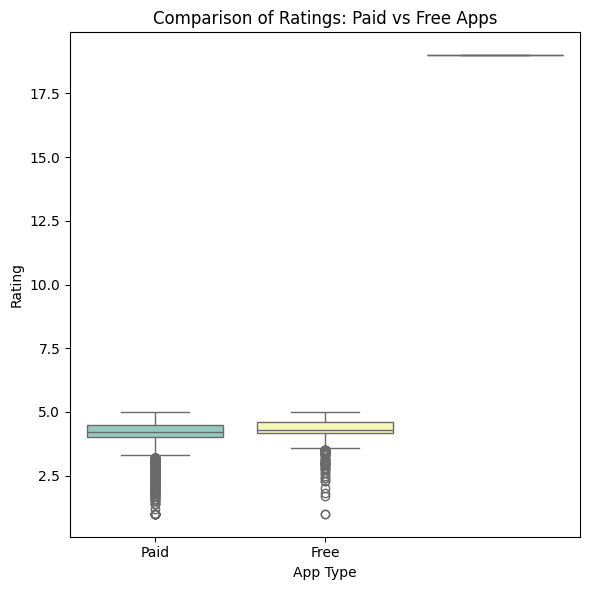

In [24]:
# Set the figure size
plt.figure(figsize=(6, 6))

# Create the boxplot using Seaborn
sns.boxplot(x='Type', y='Rating', data=df, palette='Set3')

# Set the labels and title
plt.xlabel('App Type')
plt.ylabel('Rating')
plt.title('Comparison of Ratings: Paid vs Free Apps')

# Customize x-axis tick labels
plt.xticks([0, 1], ['Paid', 'Free'])

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Display the plot
plt.show()

## 6. How does the app size vary across different categories?

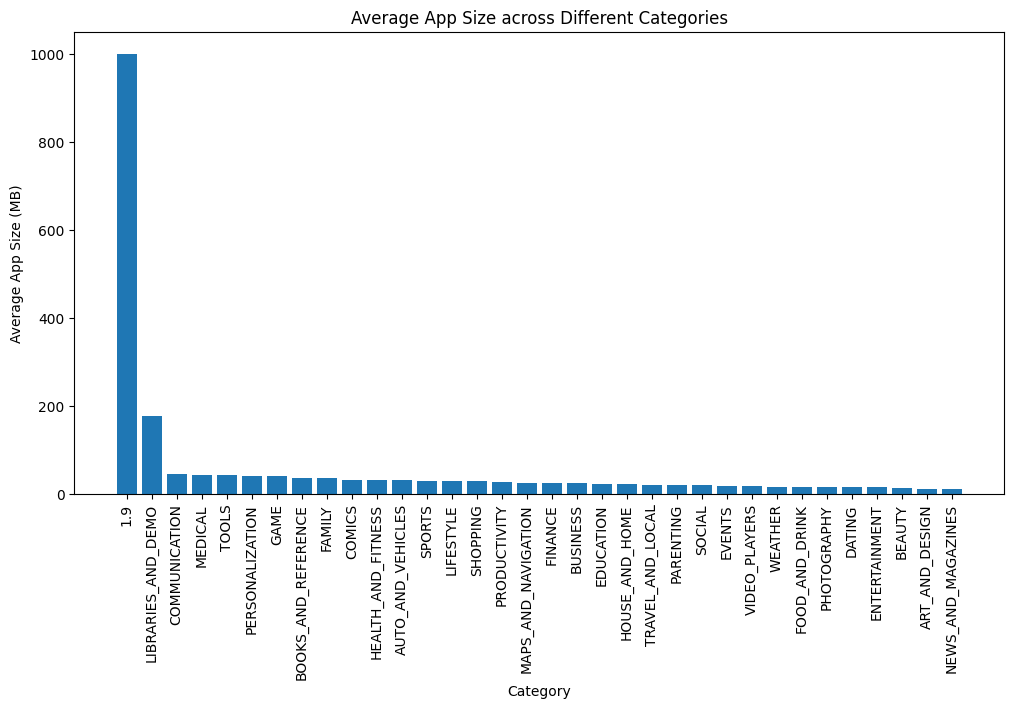

In [25]:
# Group the DataFrame by category and calculate the average app size for each category
category_avg_size = df.groupby('Category')['Size'].mean()

# Sort the categories based on average app size
sorted_categories = category_avg_size.sort_values(ascending=False)

# Create a bar plot of average app size for each category
plt.figure(figsize=(12, 6))
plt.bar(sorted_categories.index, sorted_categories.values)
plt.xlabel('Category')
plt.ylabel('Average App Size (MB)')
plt.title('Average App Size across Different Categories')
plt.xticks(rotation=90)
plt.show()

## 7. Which category has the highest average price for paid apps?

In [26]:
# Filter the DataFrame to include only paid apps
paid_apps = df[df['Type'] == 'Paid']
#-  Calculate the average price for each category
average_price_by_category = paid_apps.groupby('Category')['Price'].mean()

# Find the category with the highest average price for paid apps
category_with_highest_average_price = average_price_by_category.idxmax()

# Print the category with the highest average price for paid apps
print(f"The category with the highest average price for paid apps is: {category_with_highest_average_price}")


The category with the highest average price for paid apps is: FINANCE


## 8. What is the most recent app update date in the dataset?

In [27]:
# Find the most recent app update date
most_recent_update_date = df['Last Updated'].max()

# Print the most recent app update date
print(f"The most recent app update date is: {most_recent_update_date}")

The most recent app update date is: 2018-08-08 00:00:00


## 9. How many apps are there in each content rating category?

In [28]:
# Count the number of apps in each content rating category
app_count_by_rating = df['Content Rating'].value_counts()

# Print the number of apps in each content rating category
print("Number of apps in each content rating category:")
print(app_count_by_rating)

Number of apps in each content rating category:
Content Rating
Everyone           7904
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: count, dtype: int64


## 12. Which category has the highest number of creative or artistic apps?

In [29]:
# Filter the DataFrame to include only creative or artistic apps
creative_apps = df[df['Genres'].str.contains('Art|Design|Creativity', case=False)]

# Count the number of creative or artistic apps in each category
category_counts = creative_apps['Category'].value_counts()

# Find the category with the highest number of creative or artistic apps
category_with_highest_count = category_counts.idxmax()

# Print the category with the highest number of creative or artistic apps
print(f"The category with the highest number of creative or artistic apps is: {category_with_highest_count}")

The category with the highest number of creative or artistic apps is: ART_AND_DESIGN


## 13. What is the average rating for apps that fall under the "Art & Design" genre?

In [30]:
# Filter the DataFrame to include only "Art & Design" genre apps
art_design_apps = df[df['Genres'] == 'Art & Design']

# Calculate the average rating for "Art & Design" genre apps
average_rating = art_design_apps['Rating'].mean()

# Print the average rating for "Art & Design" genre apps
print(f"The average rating for 'Art & Design' genre apps is: {average_rating:.2f}")

The average rating for 'Art & Design' genre apps is: 4.35


## 14. How does the app rating vary with the Android version required?

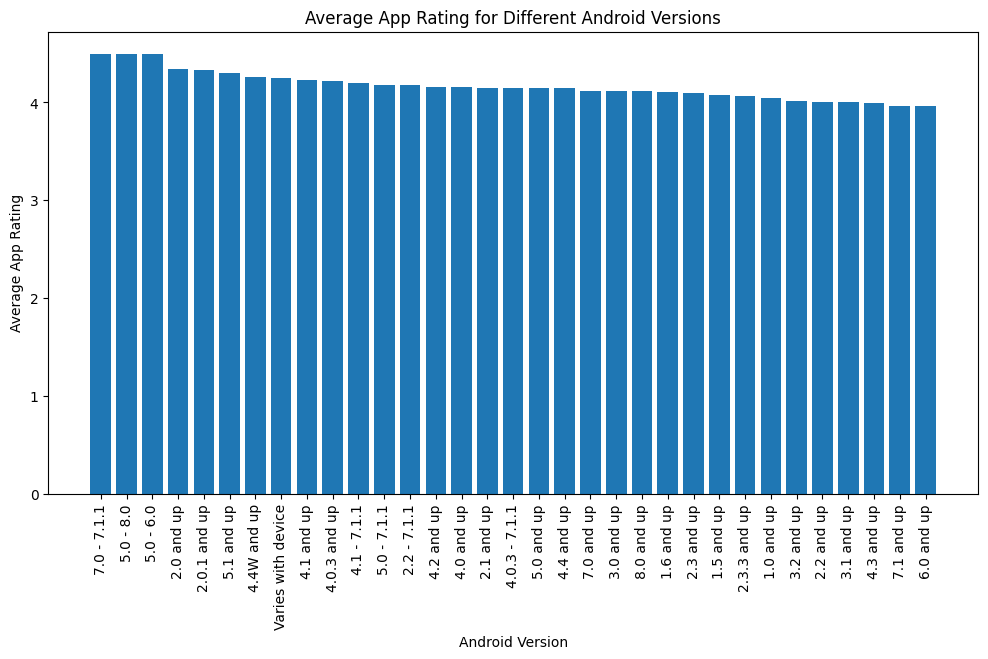

In [31]:
# Group the DataFrame by Android version and calculate the average app rating for each version
average_rating_by_android_version = df.groupby('Android Ver')['Rating'].mean()

# Sort the Android versions based on average app rating
sorted_android_versions = average_rating_by_android_version.sort_values(ascending=False)

# Create a bar plot of average app rating for each Android version
plt.figure(figsize=(12, 6))
plt.bar(sorted_android_versions.index, sorted_android_versions.values)
plt.xlabel('Android Version')
plt.ylabel('Average App Rating')
plt.title('Average App Rating for Different Android Versions')
plt.xticks(rotation=90)
plt.show()

## 15. What is the distribution of app sizes in the dataset?

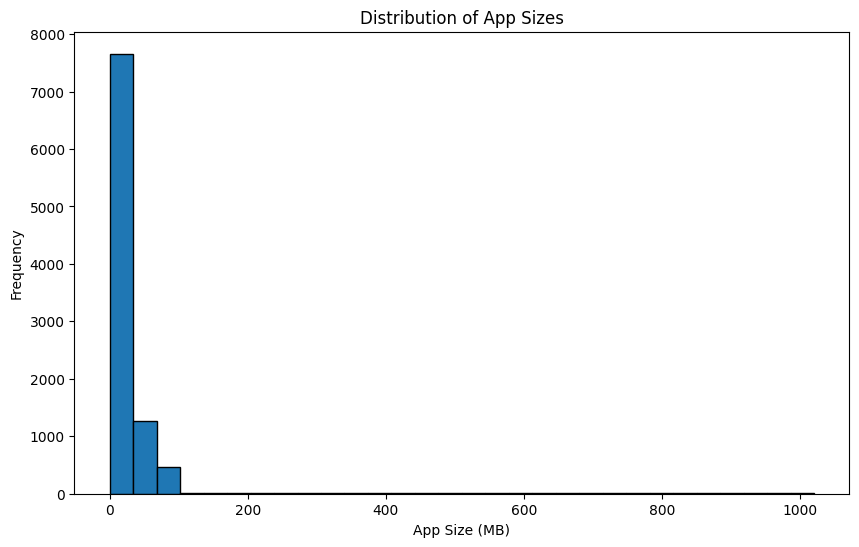

In [32]:
# Remove rows with missing or invalid values in the 'Size' column
df = df.dropna(subset=['Size'])

# Create a histogram of app sizes
plt.figure(figsize=(10, 6))
plt.hist(df['Size'], bins=30, edgecolor='black')
plt.xlabel('App Size (MB)')
plt.ylabel('Frequency')
plt.title('Distribution of App Sizes')
plt.show()

## 16. Which category has the highest number of apps?

In [33]:
# Count the number of apps in each category
app_count_by_category = df['Category'].value_counts()

# Find the category with the highest number of apps
category_with_highest_count = app_count_by_category.idxmax()

# Print the category with the highest number of apps
print(f"The category with the highest number of apps is: {category_with_highest_count}")

The category with the highest number of apps is: FAMILY
